# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks
import matplotlib.dates as mdates


In [2]:
df = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


# Part 1) prepare the dataset for time series analysis

## Filter the 4 largest cities into a new dataframe

In [3]:
four = df.loc[0:3]
four

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt the data to long-form and prepare it for time series analysis

In [5]:
#Melt the data
melted = pd.melt(four.drop(columns=['RegionID','SizeRank']),
                 id_vars=['RegionName', 'RegionType', 'StateName',
                               'State', 'Metro', 'CountyName'], 
                 value_name="HomeValue",var_name="Date")
melted

,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...
1087,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [6]:
#change date to datetime data type
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   RegionType  1092 non-null   object        
 2   StateName   1092 non-null   object        
 3   State       1092 non-null   object        
 4   Metro       1092 non-null   object        
 5   CountyName  1092 non-null   object        
 6   Date        1092 non-null   datetime64[ns]
 7   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 68.4+ KB


In [7]:
#set the date as the index
melted = melted.set_index("Date")
melted

,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,
2000-01-31,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...
2022-08-31,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


## Resample the dataframe as monthly frequency, grouped by city

In [8]:
#resample by creating a multi index with the different cities using a monthly frequency
df_ts = melted.groupby('RegionName').resample("M").sum()
df_ts

C:\Users\17175\AppData\Local\Temp\ipykernel_8992\2702474838.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\17175\AppData\Local\Temp\ipykernel_8992\2702474838.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\17175\AppData\Local\Temp\ipykernel_8992\2702474838.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be 

HomeValue
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

# Part 2) time series analysis

## Plot the home values for all 4 cities

In [10]:
#define our region names and create a copy of our dataframe
RegionNames = ['Chicago','New York','Houston','Los Angeles']
plot_df = df_ts.loc[RegionNames].copy()
plot_df

HomeValue
RegionName  Date                 
Chicago     2000-01-31   166139.0
            2000-02-29   166536.0
            2000-03-31   167368.0
            2000-04-30   168826.0
            2000-05-31   170499.0
...                           ...
Los Angeles 2022-05-31   990391.0
            2022-06-30   992337.0
            2022-07-31   992630.0
            2022-08-31   978196.0
            2022-09-30   966595.0

[1092 rows x 1 columns]

In [11]:
#unstack the multi-index
unstacked = plot_df.unstack(level=0)
unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [14]:
#define thousands format
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
fmt_thous = mticks.FuncFormatter(thousands)

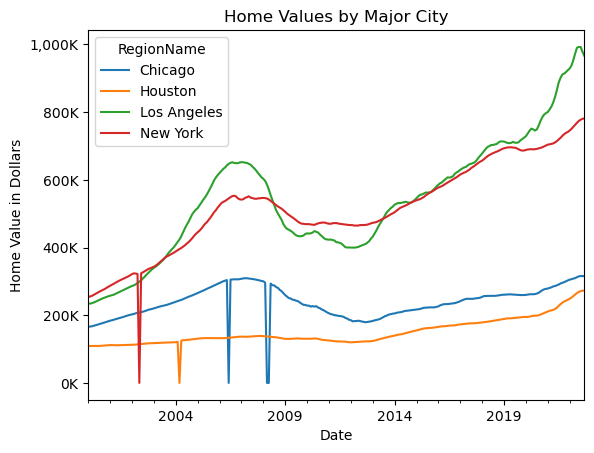

In [20]:
ax=unstacked['HomeValue'].plot(title='Home Values by Major City', ylabel='Home Value in Dollars')
ax.yaxis.set_major_formatter(fmt_thous)

## Answer stakeholder questions:

### 1) Which city had the  highest typical home value at the end of 2008? which had the least?

In [22]:
#create a copy dataframe of just the year 2008 for plotting
oneyear = unstacked.loc['2008'].copy()
oneyear

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-01-31  300207.0  138208.0    603029.0  546538.0
2008-02-29  296063.0  137512.0    596635.0  546098.0
2008-03-31       0.0  136795.0    586065.0  544562.0
2008-04-30       0.0  136628.0    571226.0  541865.0
2008-05-31  293467.0  136228.0    554589.0  537685.0
2008-06-30  288495.0  135773.0    539622.0  533810.0
2008-07-31  288174.0  135392.0    524220.0  529211.0
2008-08-31  283199.0  134770.0    510520.0  525290.0
2008-09-30  280695.0  133932.0    500124.0  521347.0
2008-10-31  274849.0  133189.0    490979.0  518048.0
2008-11-30  271059.0  132247.0    481905.0  514767.0
2008-12-31  265306.0  131283.0    469294.0  510309.0

In [39]:
#create a copy df to find the highest and lowest value
copydf = plot_df.loc[pd.IndexSlice[:,'2008'],:].copy()
copydf

HomeValue
RegionName  Date                 
Chicago     2008-01-31   300207.0
            2008-02-29   296063.0
            2008-03-31        0.0
            2008-04-30        0.0
            2008-05-31   293467.0
            2008-06-30   288495.0
            2008-07-31   288174.0
            2008-08-31   283199.0
            2008-09-30   280695.0
            2008-10-31   274849.0
            2008-11-30   271059.0
            2008-12-31   265306.0
New York    2008-01-31   546538.0
            2008-02-29   546098.0
            2008-03-31   544562.0
            2008-04-30   541865.0
            2008-05-31   537685.0
            2008-06-30   533810.0
            2008-07-31   529211.0
            2008-08-31   525290.0
            2008-09-30   521347.0
            2008-10-31   518048.0
            2008-11-30   514767.0
            2008-12-31   510309.0
Houston     2008-01-31   138208.0
            2008-02-29   137512.0
            2008-03-31   136795.0
            2008-04-30   136628.0
            2008-05-31   136228.0
            2008-06-30   135773.0
            2008-07-31   135392.0
            2008-08-31   134770.0
            2008-09-30   133932.0
            2008-10-31   133189.0
            2008-11-30   132247.0
            2008-12-31   131283.0
Los Angeles 2008-01-31   603029.0
            2008-02-29   596635.0
            2008-03-31   586065.0
            2008-04-30   571226.0
            2008-05-31   554589.0
            2008-06-30   539622.0
            2008-07-31   524220.0
            2008-08-31   510520.0
            2008-09-30   500124.0
            2008-10-31   490979.0
            2008-11-30   481905.0
            2008-12-31   469294.0

In [44]:
#find the highest value
maxvalue = copydf.idxmax()
copydf.loc[maxvalue]

,,HomeValue
RegionName,Date,
Los Angeles,2008-01-31,603029.0


In [45]:
#find the lowest value
minvalue = copydf.idxmin()
copydf.loc[minvalue]

,,HomeValue
RegionName,Date,
Chicago,2008-03-31,0.0


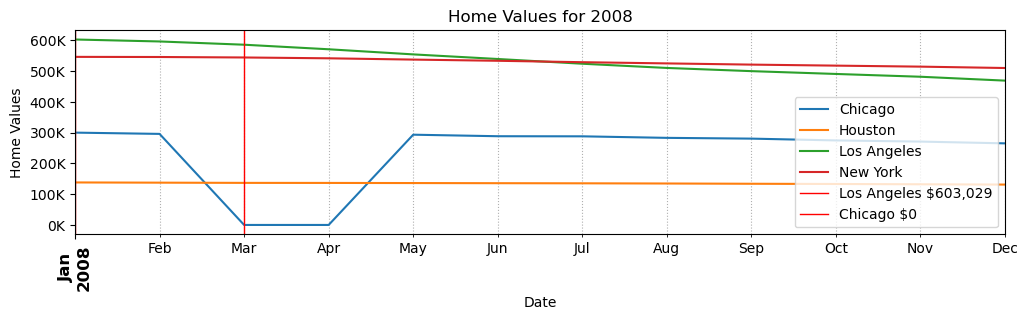

In [47]:
#plot the max and min
fig, ax = plt.subplots(figsize=(12,3))
oneyear['HomeValue'].plot(ax=ax,title='Home Values for 2008',ylabel='Home Values');
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' );
ax.yaxis.set_major_formatter(fmt_thous)
ax.axvline("2008-01-31",color='red',lw=1, label='Los Angeles $603,029')
ax.axvline("2008-03-31",color='red',lw=1, label='Chicago $0')
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
ax.legend();

#### The minimum homevalue for 2008 was 0 dollars in Chicago.
#### The max value for 2008 was 603,029 dollars in Los Angeles

### 2) How much did the home values change from November 2008 to December 2008(in dollars)?